<a href="https://colab.research.google.com/github/seemantKaul/MachineLearning/blob/master/Kaggle_Dog_breed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class image classifier to identify the breed of a dog from image

---

## Problem
To identify the breed of a dog from picture

## Data Source
Data is from Kaggle.com
https://www.kaggle.com/c/dog-breed-identification/data

## Evaluation
output is a probability number of each breed for an image   
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## Features
We have unstructured data (images) so we will do a Transfer learning.
We have 10,000 images in Training and 10,000 images in Test
We have a csv file with filename and its breed. 



In [0]:
# import tensorflow as tf

### Importing Tensorflow

In [1]:
## import tenserflow 2.x
try:
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [3]:
tf.__version__

'2.1.0'

### Unzipping files

In [0]:
# !unzip 'drive/My Drive/Colab Notebooks/Data/Dog_Breed_Detection/dog-breed-identification.zip' -d '/content/drive/My Drive/Colab Notebooks/Data/Dog_Breed_Detection/'

### comparing file count with Label count

In [0]:
import pandas as pd
labels_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Dog_Breed_Detection/labels.csv')

In [5]:
len(labels_df)

10222

In [7]:
import os
len(os.listdir('/content/drive/My Drive/Colab Notebooks/Data/Dog_Breed_Detection/train/'))

10222

### Importing Tensorflow hub

In [0]:
import tensorflow_hub as hub

### Checking if GPU is installed
if not, clik on 'Chnage Runtime type' and select GPU


In [9]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Visualizing the cass spread

In [10]:
labels_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


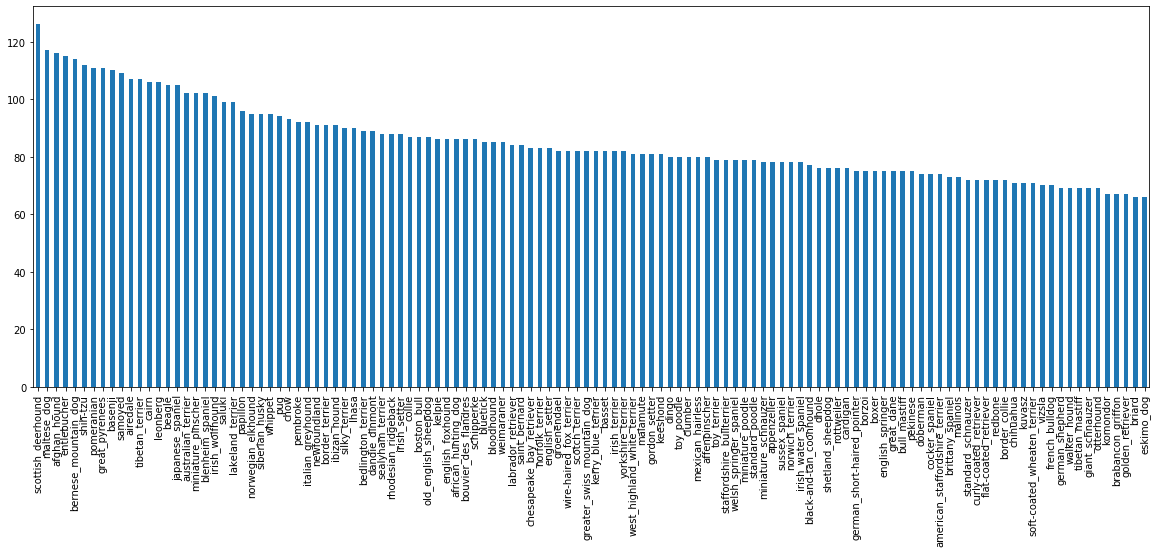

In [11]:
labels_df["breed"].value_counts().plot(kind="bar", figsize = (20,7));

In [12]:
labels_df.describe()

,id,breed
count,10222,10222
unique,10222,120
top,74f4fa04d8752fff46c4d10fafe3e072,scottish_deerhound
freq,1,126


In [13]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
id       10222 non-null object
breed    10222 non-null object
dtypes: object(2)
memory usage: 159.8+ KB


### Creating target matrix of boolean values

In [0]:
# grab unique breeds
import numpy as np
breeds = np.array(labels_df['breed'])

In [15]:
len(breeds)

10222

In [0]:
breed_header = np.unique(breeds)

In [17]:
len(breed_header)

120

In [0]:
target_matrix = [(breed==breed_header) for breed in breeds]

In [0]:
label_bool = np.array(target_matrix)

In [22]:
label_bool[:10]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

## Getting filenames

In [0]:
filenames = "/content/drive/My Drive/Colab Notebooks/Data/Dog_Breed_Detection/train/" + labels_df['id'] + ".jpg"

In [35]:
filenames.head()

0    /content/drive/My Drive/Colab Notebooks/Data/D...
1    /content/drive/My Drive/Colab Notebooks/Data/D...
2    /content/drive/My Drive/Colab Notebooks/Data/D...
3    /content/drive/My Drive/Colab Notebooks/Data/D...
4    /content/drive/My Drive/Colab Notebooks/Data/D...
Name: id, dtype: object

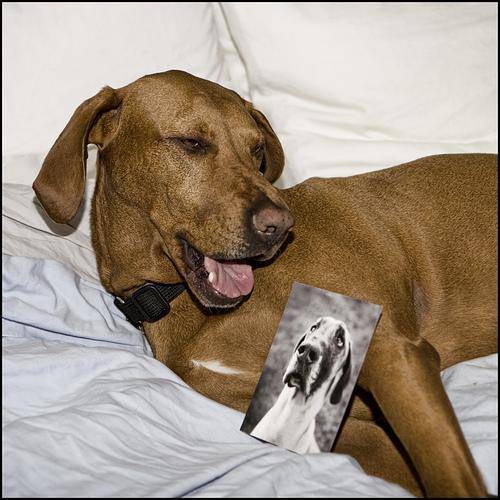

In [39]:
# Open a file and check
from IPython.display import display, Image


In [44]:
Image(filenames[112]), labels_df['breed'][112]
# filenames[100]

(<IPython.core.display.Image object>, 'bull_mastiff')

## Split Train data into Train and Validate set

In [0]:
SIZE_LIMIT = 1000 #@param {type:"slider", min:1000, max:10223, step:1 }
X = filenames[:SIZE_LIMIT]
y = label_bool[:SIZE_LIMIT]

In [0]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)

In [56]:
len(X_train), len(X_val),  len(y_train), len(y_val)

(800, 200, 800, 200)

# Image pre-processing
## create a fuction for Image pre-processing
1. Reads an image filepath as input
2. Use Tensorflow to read the file and save it to a variable 'image'
3. Converts the 'image' to Tensor (matrix of numbers)
4. Normalize the color channels from (0-255) to (0-1)
5. resize the image to 224 X 224
6. Return the modified image


In [0]:
from matplotlib.pyplot import imread

In [0]:
# reading image as a numpy array
image = imread(filenames[10])

In [63]:
image[:2]

array([[[110, 100, 108],
        [120, 110, 118],
        [112, 102, 110],
        ...,
        [ 75,  68,  75],
        [ 80,  73,  80],
        [ 74,  67,  74]],

       [[ 99,  89,  97],
        [112, 102, 110],
        [109,  99, 107],
        ...,
        [ 73,  67,  71],
        [ 78,  72,  76],
        [ 73,  67,  71]]], dtype=uint8)

In [0]:
# converting numpy array into tensor
tensor = tf.constant(image)

In [68]:
tensor[:2]

<tf.Tensor: shape=(2, 375, 3), dtype=uint8, numpy=
array([[[110, 100, 108],
        [120, 110, 118],
        [112, 102, 110],
        ...,
        [ 75,  68,  75],
        [ 80,  73,  80],
        [ 74,  67,  74]],

       [[ 99,  89,  97],
        [112, 102, 110],
        [109,  99, 107],
        ...,
        [ 73,  67,  71],
        [ 78,  72,  76],
        [ 73,  67,  71]]], dtype=uint8)>

In [0]:
IMG_SIZE = 224
def process_image(img_path, size = IMG_SIZE):
  # Read the file using tensorflow
  image = tf.io.read_file(img_path)
  
  # Convert file into tensor
  image = tf.image.decode_jpeg(image, channels=3)

  # Normalize the RGB channel
  image = tf.image.convert_image_dtype(image,tf.float32)

  # Resize the image
  image = tf.image.resize(image, size = [size, size])
  
  return image